adapted from original author: https://elitedatascience.com/keras-tutorial-deep-learning-in-python

In [1]:
import numpy as np
import theano

import Sequential model from Kera (TF backend) and generate random seed from numpy

In [2]:
np.random.seed(123)
	
from keras.models import Sequential

Using TensorFlow backend.


importing layers from neural networks, plus import CNN layers, import utilie methods from Keras

In [5]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

# Testing on the MNIST dataset

In [6]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


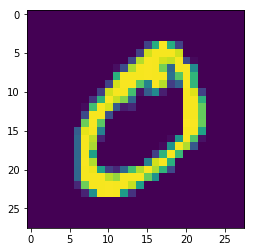

In [19]:
from matplotlib import pyplot as plt
im = X_train[1]
plt.imshow(im)
plt.show()

reshaping data: declaring the depth of the images to be 1

In [21]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
print X_train.shape

(60000, 1, 28, 28)


In [22]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

The shape of y_train needs to be changed

In [23]:
print y_train.shape

(60000,)


In [25]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print Y_test.shape

(10000, 10)


define model as sequential, and input the layers to the networks, also updating backend image ordering to theano

In [27]:
model = Sequential()

In [29]:
from keras import backend as K
K.set_image_dim_ordering('th')
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))

/Users/junyuanke/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(1, 28, 28...)`
  app.launch_new_instance()


In [30]:
print model.output_shape

(None, 32, 26, 26)


add more layers to the model

In [31]:
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

/Users/junyuanke/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':


add connected layer and output layer

In [32]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

compiling model:

In [33]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [34]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/Users/junyuanke/anaconda/envs/py27/lib/python2.7/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 202s 3ms/step - loss: 0.2141 - acc: 0.9347
Epoch 2/10
60000/60000 [==============================] - 197s 3ms/step - loss: 0.0899 - acc: 0.9727
Epoch 3/10
60000/60000 [==============================] - 197s 3ms/step - loss: 0.0710 - acc: 0.9787
Epoch 4/10
60000/60000 [==============================] - 202s 3ms/step - loss: 0.0596 - acc: 0.9819
Epoch 5/10
60000/60000 [==============================] - 208s 3ms/step - loss: 0.0518 - acc: 0.9845
Epoch 6/10
60000/60000 [==============================] - 202s 3ms/step - loss: 0.0414 - acc: 0.9871
Epoch 7/10
60000/60000 [==============================] - 203s 3ms/step - loss: 0.0417 - acc: 0.9871
Epoch 8/10
60000/60000 [==============================] - 204s 3ms/step - loss: 0.0364 - acc: 0.9886
Epoch 9/10
60000/60000 [==============================] - 204s 3ms/step - loss: 0.0350 - acc: 0.9889
Epoch 10/10
60000/60000 [==============================] - 198s 3ms/step - loss: 0.0296 - a

In [35]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [36]:
print score

[0.030295072780628561, 0.99119999999999997]
